/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


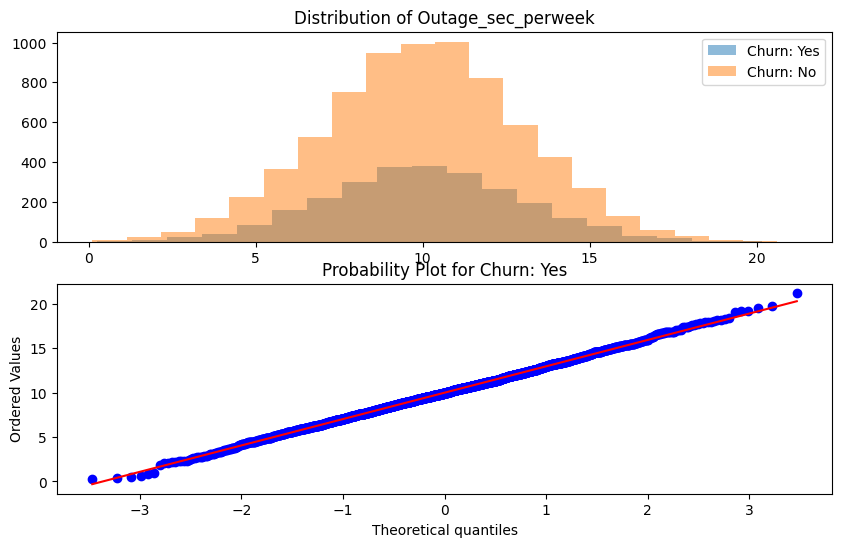

Shapiro-Wilk test p-value for Churn: Yes = 0.3928
Shapiro-Wilk test p-value for Churn: No = 0.4692
Levene's test p-value for equality of variances = 0.5812


In [1]:
#B
#checking the assumptions to see if t-test is appropriate
#Import packages 
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from scipy.stats import chi2_contingency



#Read the CSV file 
data = pd.read_csv('churn_clean.csv')

# Extract the 'Outage_sec_perweek' column for customers who churned and those who didn't churn
churn_yes = data[data['Churn'] == 'Yes']['Outage_sec_perweek']
churn_no = data[data['Churn'] == 'No']['Outage_sec_perweek']

# Check for normality using Shapiro-Wilk test (Scipy, n.d.)
_, p_value_churn_yes = stats.shapiro(churn_yes)
_, p_value_churn_no = stats.shapiro(churn_no)

# Check for equality of variances using Levene's test (Scipy, n.d.).
_, p_value_var = stats.levene(churn_yes, churn_no)

# Visualization of the distribution
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.hist(churn_yes, bins=20, alpha=0.5, label='Churn: Yes')
plt.hist(churn_no, bins=20, alpha=0.5, label='Churn: No')
plt.title('Distribution of Outage_sec_perweek')
plt.legend()

plt.subplot(2, 1, 2)
stats.probplot(churn_yes, dist="norm", plot=plt)
plt.title('Probability Plot for Churn: Yes')

plt.show()

# Print results
print(f"Shapiro-Wilk test p-value for Churn: Yes = {p_value_churn_yes:.4f}")
print(f"Shapiro-Wilk test p-value for Churn: No = {p_value_churn_no:.4f}")
print(f"Levene's test p-value for equality of variances = {p_value_var:.4f}")


In [2]:
#B1
# Extract the 'Outage_sec_perweek' column for customers who churned and those who didn't churn

# t-test (Scipy, n.d.)
t_statistic, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=True)  

# Print the results
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Results
alpha = .05
if p_value < alpha:
    print("H1: Reject the null hypothesis. There is a significant difference in mean outage duration between churned and non-churned customers.")
else:
    print("H0: Fail to reject the null hypothesis. There is no significant difference in mean outage duration between churned and non-churned customers.")


t-statistic: -0.0156
p-value: 0.9875
H0: Fail to reject the null hypothesis. There is no significant difference in mean outage duration between churned and non-churned customers.


In [8]:
#Looking at the variables
churn_distribution = data['Churn'].value_counts()
techie_distribution = data['Techie'].value_counts()
continuous_variables_summary = data[['Outage_sec_perweek', 'Tenure']].describe()
# Print the results
print("Distribution of Churn:")
print(churn_distribution)
print("Distribution of Techie:")
print(techie_distribution)
print("Summary statistics for Outage_sec_perweek and Tenure:")
print(continuous_variables_summary)

Distribution of Churn:
No     7350
Yes    2650
Name: Churn, dtype: int64
Distribution of Techie:
No     8321
Yes    1679
Name: Techie, dtype: int64
Summary statistics for Outage_sec_perweek and Tenure:
       Outage_sec_perweek        Tenure
count        10000.000000  10000.000000
mean            10.001848     34.526188
std              2.976019     26.443063
min              0.099747      1.000259
25%              8.018214      7.917694
50%             10.018560     35.430507
75%             11.969485     61.479795
max             21.207230     71.999280


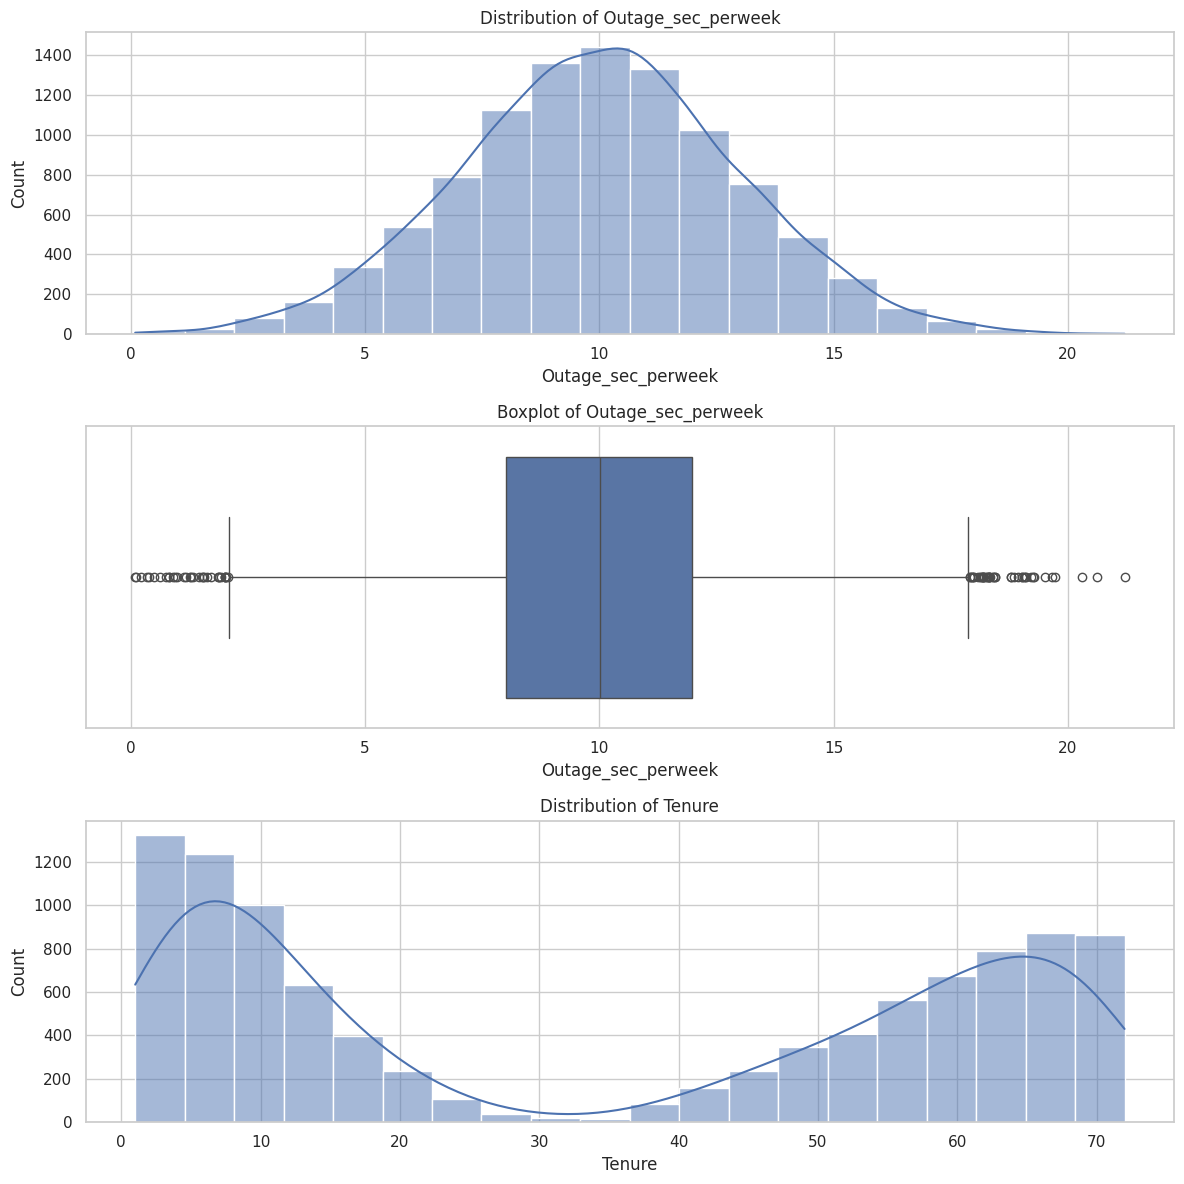

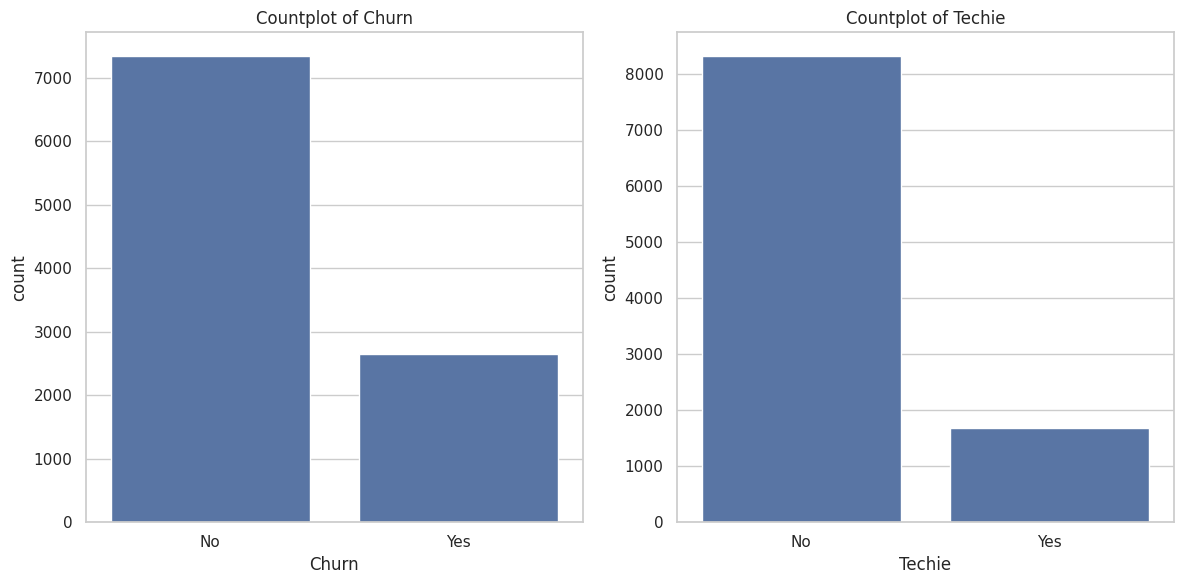

In [4]:
# C

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Graphs for continuous variables (Outage_sec_perweek, Tenure)
plt.figure(figsize=(12, 12))

# Subplot 1: Histogram for Outage_sec_perweek
plt.subplot(3, 1, 1) #(matplotlib, n.d.)
sns.histplot(data['Outage_sec_perweek'], bins=20, kde=True)
plt.title('Distribution of Outage_sec_perweek')
# Subplot 1 shows a bell curve indicating a normal distribution.

# Subplot 2: Boxplot for Outage_sec_perweek
plt.subplot(3, 1, 2)
sns.boxplot(x=data['Outage_sec_perweek'])
plt.title('Boxplot of Outage_sec_perweek')
# Subplot 2 shows outliers within the data.


# Subplot 3: Histogram for Tenure
plt.subplot(3, 1, 3)
sns.histplot(data['Tenure'], bins=20, kde=True)
plt.title('Distribution of Tenure')
# Subplot 3 shows a bimodal distribution (Yi, n.d.).

plt.tight_layout()
plt.show()

# Categorical variables (Churn, Techie)
plt.figure(figsize=(12, 6))

# Subplot 4: Countplot for Churn
plt.subplot(1, 2, 1)
sns.countplot(x=data['Churn'])
plt.title('Countplot of Churn')
# Subplot 4 shows that the majority answer was no.

# Subplot 5: Countplot for Techie
plt.subplot(1, 2, 2)
sns.countplot(x=data['Techie'])
plt.title('Countplot of Techie')
# Subplot 5 shows that the majority answer was no.


plt.tight_layout()
plt.show()


In [5]:
#Statistics for continuous variables
print("Summary statistics for Bandwidth_GB_Year:")
print(data['Bandwidth_GB_Year'].describe())
print("\nSummary statistics for MonthlyCharge:")
print(data['MonthlyCharge'].describe())

# Value counts for PaymentMethod and PaperlessBilling
print("\nValue counts for PaymentMethod:")
print(data['PaymentMethod'].value_counts())
print("\nValue counts for PaperlessBilling:")
print(data['PaperlessBilling'].value_counts())

Summary statistics for Bandwidth_GB_Year:
count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

Summary statistics for MonthlyCharge:
count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

Value counts for PaymentMethod:
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

Value counts for PaperlessBilling:
Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64


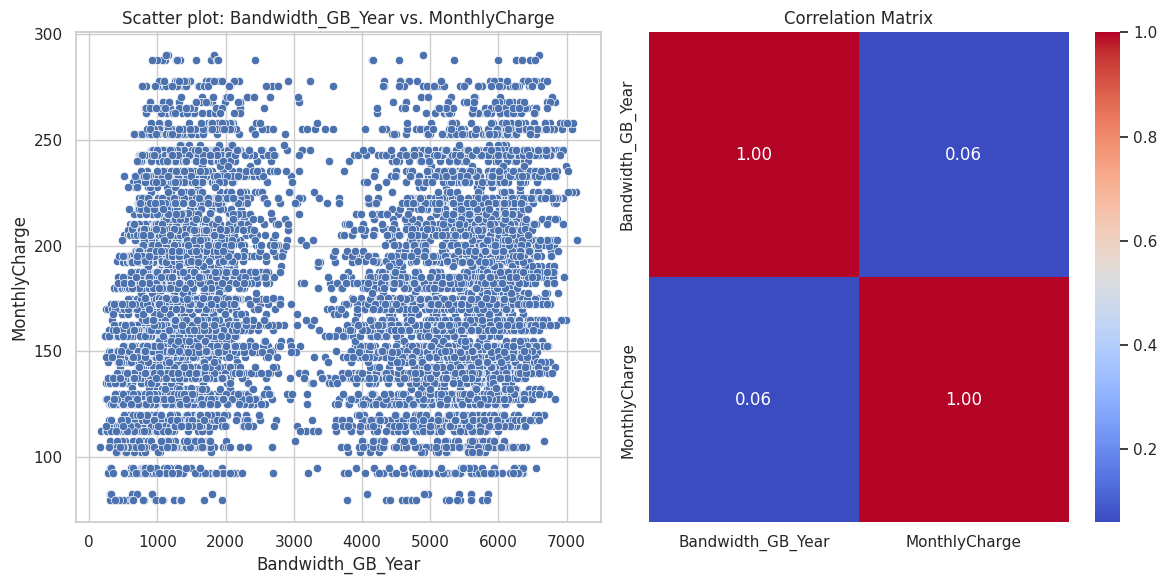


Chi-square value: 1.5205
P-value: 0.6776


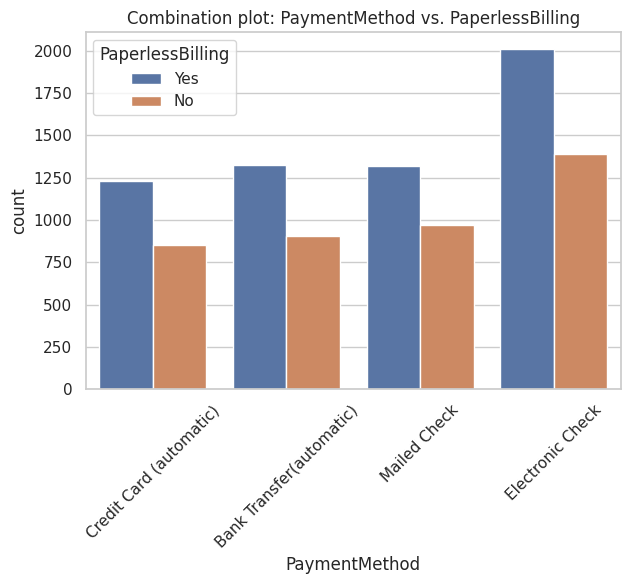

In [6]:
#D

# Bivariate statistics for continuous variables
plt.figure(figsize=(12, 6))

# Scatter plot for Bandwidth_GB_Year vs. MonthlyCharge
plt.subplot(1, 2, 1)
sns.scatterplot(x='Bandwidth_GB_Year', y='MonthlyCharge', data=data)
plt.title('Scatter plot: Bandwidth_GB_Year vs. MonthlyCharge')
#The scatter plot shows two clusters.

# Correlation matrix for continuous variables
correlation_matrix = data[['Bandwidth_GB_Year', 'MonthlyCharge']].corr()

# Heatmap for the correlation matrix
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
# The heatmapp indicates a strong correlation between bandwidth usage and monthly charge.


# Bivariate statistics for categorical variables
plt.figure(figsize=(12, 6))

# Combination plot for PaymentMethod and PaperlessBilling
plt.subplot(1, 2, 1)
sns.countplot(x='PaymentMethod', hue='PaperlessBilling', data=data)
plt.title('Combination plot: PaymentMethod vs. PaperlessBilling')
plt.xticks(rotation=45)  
# The combination plot indicates that paper billing is utilized across all payment methods.

# Contingency table (Pydata, n.d.)
contingency_table = pd.crosstab(data['PaymentMethod'], data['PaperlessBilling'])

# Performing the chi-square test (Scipy, n.d.)
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"\nChi-square value: {chi2:.4f}")
print(f"P-value: {p:.4f}")
#The chi-square test indicates a p-value higher than .05, indicating a lack of correlation between PaymentMethod and PaperlessBilling.
plt.tight_layout()
plt.show()
